# Clinic Data Exploratory Data Analysis

In [1]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, pairwise_logrank_test
from scipy import stats
from itertools import product

from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Import patient clinic data
input_file = 'drive/MyDrive/MSK/data_clinical_patient.csv'
raw_patient = pd.read_table(input_file, sep=',')

In [4]:
raw_patient.shape

(594, 37)

In [5]:
 raw_patient.columns

Index(['PATIENT_ID', 'SUBTYPE', 'CANCER_TYPE_ACRONYM', 'OTHER_PATIENT_ID',
       'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE', 'AJCC_STAGING_EDITION',
       'DAYS_LAST_FOLLOWUP', 'DAYS_TO_BIRTH',
       'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'ETHNICITY',
       'FORM_COMPLETION_DATE', 'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10',
       'ICD_O_3_HISTOLOGY', 'ICD_O_3_SITE', 'INFORMED_CONSENT_VERIFIED',
       'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'PATH_M_STAGE',
       'PATH_N_STAGE', 'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
       'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX', 'RACE',
       'RADIATION_THERAPY', 'WEIGHT', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS',
       'OS_MONTHS', 'DSS_STATUS', 'DSS_MONTHS', 'DFS_STATUS', 'DFS_MONTHS',
       'PFS_STATUS', 'PFS_MONTHS'],
      dtype='object')

In [6]:
raw_patient.dtypes

PATIENT_ID                                     object
SUBTYPE                                        object
CANCER_TYPE_ACRONYM                            object
OTHER_PATIENT_ID                               object
AGE                                           float64
SEX                                            object
AJCC_PATHOLOGIC_TUMOR_STAGE                    object
AJCC_STAGING_EDITION                           object
DAYS_LAST_FOLLOWUP                            float64
DAYS_TO_BIRTH                                 float64
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS          float64
ETHNICITY                                      object
FORM_COMPLETION_DATE                           object
HISTORY_NEOADJUVANT_TRTYN                      object
ICD_10                                         object
ICD_O_3_HISTOLOGY                              object
ICD_O_3_SITE                                   object
INFORMED_CONSENT_VERIFIED                      object
NEW_TUMOR_EVENT_AFTER_INITIA

In [7]:
raw_patient.nunique()

PATIENT_ID                                    594
SUBTYPE                                         8
CANCER_TYPE_ACRONYM                             2
OTHER_PATIENT_ID                              592
AGE                                            59
SEX                                             2
AJCC_PATHOLOGIC_TUMOR_STAGE                    13
AJCC_STAGING_EDITION                            4
DAYS_LAST_FOLLOWUP                            342
DAYS_TO_BIRTH                                 548
DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS            1
ETHNICITY                                       2
FORM_COMPLETION_DATE                          142
HISTORY_NEOADJUVANT_TRTYN                       2
ICD_10                                         12
ICD_O_3_HISTOLOGY                               9
ICD_O_3_SITE                                   12
INFORMED_CONSENT_VERIFIED                       1
NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT         2
PATH_M_STAGE                                    5


In [8]:
raw_patient.describe(include='all')

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,WEIGHT,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
count,594,459,594,592,592.000000,592,580,524,544.000000,590.000000,...,317.000000,594,591,590.000000,570,590.000000,223,223.000000,591,590.000000
unique,594,8,2,592,NaN,2,13,4,NaN,NaN,...,NaN,2,2,NaN,2,NaN,2,NaN,2,NaN
top,TCGA-3L-AA1B,COAD_CIN,COAD,A94E1279-A975-480A-93E9-7B1FF05CBCBF,NaN,Male,STAGE IIA,6TH,NaN,NaN,...,NaN,Yes,0:LIVING,NaN,0:ALIVE OR DEAD TUMOR FREE,NaN,0:DiseaseFree,NaN,0:CENSORED,NaN
freq,1,226,439,1,NaN,312,171,257,NaN,NaN,...,NaN,459,471,NaN,497,NaN,193,NaN,441,NaN
mean,NaN,NaN,NaN,NaN,66.123311,NaN,NaN,NaN,806.963235,-24319.216949,...,80.282151,NaN,NaN,27.098807,NaN,27.098807,NaN,30.178427,NaN,24.158714
std,NaN,NaN,NaN,NaN,12.875428,NaN,NaN,NaN,768.585696,4698.982877,...,20.999008,NaN,NaN,24.463500,NaN,24.463500,NaN,21.160558,NaN,23.319578
min,NaN,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,-9.000000,-32873.000000,...,34.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.526022,NaN,0.000000
25%,NaN,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,365.000000,-27831.000000,...,64.900000,NaN,NaN,12.238222,NaN,12.238222,NaN,16.684749,NaN,10.076602
50%,NaN,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,626.000000,-24837.000000,...,78.100000,NaN,NaN,21.073742,NaN,21.073742,NaN,26.038071,NaN,18.920341
75%,NaN,NaN,NaN,NaN,76.000000,NaN,NaN,NaN,1065.250000,-21298.750000,...,91.800000,NaN,NaN,35.925634,NaN,35.925634,NaN,37.018772,NaN,32.711970


In [9]:
raw_patient.set_index('PATIENT_ID', inplace=True)

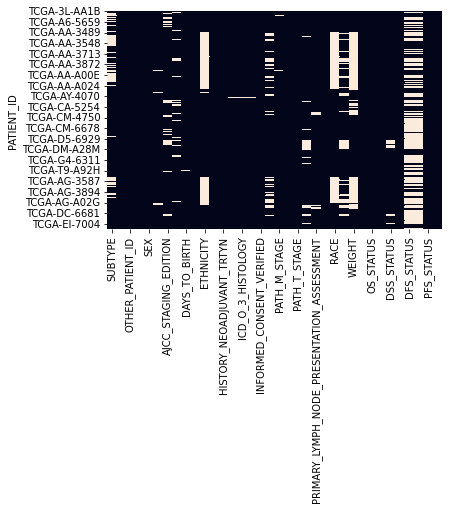

In [10]:
sns.heatmap(raw_patient.isnull(), cbar=False)

In [11]:
# Drop columns with over 20% missing values
min_nona = round(594*0.8)
raw_patient.dropna(axis=1, thresh=min_nona, inplace=True)

In [12]:
raw_patient.shape

(594, 30)

In [13]:
raw_patient.columns

Index(['CANCER_TYPE_ACRONYM', 'OTHER_PATIENT_ID', 'AGE', 'SEX',
       'AJCC_PATHOLOGIC_TUMOR_STAGE', 'AJCC_STAGING_EDITION',
       'DAYS_LAST_FOLLOWUP', 'DAYS_TO_BIRTH',
       'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'FORM_COMPLETION_DATE',
       'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10', 'ICD_O_3_HISTOLOGY',
       'ICD_O_3_SITE', 'INFORMED_CONSENT_VERIFIED',
       'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'PATH_M_STAGE',
       'PATH_N_STAGE', 'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
       'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX',
       'RADIATION_THERAPY', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS',
       'OS_MONTHS', 'DSS_STATUS', 'DSS_MONTHS', 'PFS_STATUS', 'PFS_MONTHS'],
      dtype='object')

In [14]:
# Drop redundant features
raw_patient.drop(['OTHER_PATIENT_ID', 'AJCC_STAGING_EDITION', 'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'FORM_COMPLETION_DATE', 'ICD_O_3_SITE', 'ICD_O_3_HISTOLOGY', 'INFORMED_CONSENT_VERIFIED', 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', 'DSS_STATUS', 'DSS_MONTHS', 'PFS_STATUS', 'PFS_MONTHS'], axis=1, inplace=True)

In [15]:
raw_patient.columns

Index(['CANCER_TYPE_ACRONYM', 'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
       'DAYS_LAST_FOLLOWUP', 'DAYS_TO_BIRTH', 'HISTORY_NEOADJUVANT_TRTYN',
       'ICD_10', 'PATH_M_STAGE', 'PATH_N_STAGE', 'PATH_T_STAGE',
       'PERSON_NEOPLASM_CANCER_STATUS',
       'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX',
       'RADIATION_THERAPY', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS',
       'OS_MONTHS'],
      dtype='object')

In [16]:
# Check unique values and percentage of missing values for each feature
# raw_patient['OS_STATUS'].unique()
# raw_patient['OS_STATUS'].isnull().mean()

In [17]:
# Drop rows with more than 2 missing features
raw_patient.dropna(thresh=len(raw_patient.columns)-2, axis=0, inplace=True)
raw_patient.shape

(583, 18)

In [18]:
# Select features
patient = raw_patient.loc[:, ['CANCER_TYPE_ACRONYM', 'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE', 'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10', 'PATH_M_STAGE', 'PATH_N_STAGE', 'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS', 'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX', 'RADIATION_THERAPY', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS', 'OS_MONTHS']]

In [19]:
patient.describe(include='all')

,CANCER_TYPE_ACRONYM,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,HISTORY_NEOADJUVANT_TRTYN,ICD_10,PATH_M_STAGE,PATH_N_STAGE,PATH_T_STAGE,PERSON_NEOPLASM_CANCER_STATUS,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT,PRIOR_DX,RADIATION_THERAPY,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS
count,583,583.000000,583,572,583,582,577,583,583,530,569,583,490,583,583,583.000000
unique,2,NaN,2,13,2,12,5,9,7,2,2,3,2,2,2,NaN
top,COAD,NaN,Male,STAGE IIA,No,C18.7,M0,N0,T3,With Tumor,Yes,No,No,Yes,0:LIVING,NaN
freq,432,NaN,307,169,581,104,435,337,393,274,550,531,463,449,468,NaN
mean,NaN,66.147513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.103704
std,NaN,12.866170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.530674
min,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.279317
50%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.007989
75%,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.769471


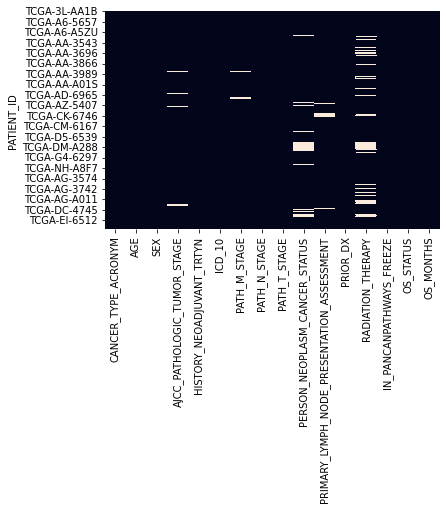

In [20]:
sns.heatmap(patient.isnull(), cbar=False)

In [21]:
# Correlation between age and survival status
patient['OS_STATUS'].replace(['1:DECEASED', '0:LIVING'], [1, 0], inplace=True)
stats.pointbiserialr(patient['OS_STATUS'], patient['AGE'])

PointbiserialrResult(correlation=0.17370471179295147, pvalue=2.472795463277321e-05)

In [22]:
patient['AGE_bin'] = patient['AGE'].apply(lambda x: '>=65' if x>=patient['AGE'].median() else '<65')

In [23]:
path = '/content/drive/My Drive/patient_modified.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  patient.to_csv(f)

In [24]:
patient_cat = patient.drop(['OS_MONTHS'], axis=1)
cat_var_comb = [
    ('AGE_bin', 'OS_STATUS'),
    ('CANCER_TYPE_ACRONYM', 'OS_STATUS'), 
    ('SEX', 'OS_STATUS'), 
    ('AJCC_PATHOLOGIC_TUMOR_STAGE', 'OS_STATUS'), 
    ('HISTORY_NEOADJUVANT_TRTYN', 'OS_STATUS'), 
    ('ICD_10', 'OS_STATUS'), 
    ('PATH_M_STAGE', 'OS_STATUS'), 
    ('PATH_N_STAGE', 'OS_STATUS'), 
    ('PATH_T_STAGE', 'OS_STATUS'), 
    ('PERSON_NEOPLASM_CANCER_STATUS', 'OS_STATUS'),
    ('PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'OS_STATUS'),
    ('PRIOR_DX', 'OS_STATUS'), 
    ('RADIATION_THERAPY', 'OS_STATUS'), 
    ('IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS'), 
    ]

p_value = []
for i in cat_var_comb:
  p_value.append((i[0], i[1], list(stats.chi2_contingency(pd.crosstab(patient[i[0]], patient[i[1]])))[1]))
p_value

[('AGE_bin', 'OS_STATUS', 1.8689342087061189e-06),
 ('CANCER_TYPE_ACRONYM', 'OS_STATUS', 0.04901639722438539),
 ('SEX', 'OS_STATUS', 0.8442387166489805),
 ('AJCC_PATHOLOGIC_TUMOR_STAGE', 'OS_STATUS', 4.633211561029838e-10),
 ('HISTORY_NEOADJUVANT_TRTYN', 'OS_STATUS', 1.0),
 ('ICD_10', 'OS_STATUS', 0.20585233956672158),
 ('PATH_M_STAGE', 'OS_STATUS', 6.607278201269427e-08),
 ('PATH_N_STAGE', 'OS_STATUS', 1.2722676489631502e-06),
 ('PATH_T_STAGE', 'OS_STATUS', 0.0004800937568439544),
 ('PERSON_NEOPLASM_CANCER_STATUS', 'OS_STATUS', 8.52542336199743e-05),
 ('PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT',
  'OS_STATUS',
  0.4564184879452067),
 ('PRIOR_DX', 'OS_STATUS', 0.49522202597493037),
 ('RADIATION_THERAPY', 'OS_STATUS', 0.09186676628991135),
 ('IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS', 0.33068317381255796)]

# Survival Analysis

## Scikit-Survival

In [25]:
!pip install scikit-survival

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Kaplan-Meier

In [26]:
from sksurv.util import Surv

In [27]:
data_y = Surv().from_dataframe("OS_STATUS", "OS_MONTHS", patient)
data_x = patient.drop(["OS_STATUS", "OS_MONTHS"], axis=1)
data_y

array([(False,  15.61626722), (False,   4.7999474 ),
       (False,  12.65739554), ( True,   1.61094125),
       ( True,   9.53414209), (False,  39.45162245),
       ( True,  43.75842457), (False,  46.65154355),
       (False,  43.75842457), (False,  43.42966105),
       ( True,  42.90363941), ( True,  24.32850051),
       (False,  42.27898872), (False,  44.90909689),
       (False,  35.11194398), (False,  45.59950028),
       ( True,  13.93957327), ( True,  16.56968143),
       (False,  37.05164875), (False,  37.24890686),
       ( True,  37.0187724 ), (False,  34.65167505),
       (False,  33.33662097), (False,  32.74484663),
       (False,  36.52562712), ( True,  14.5313476 ),
       (False,  32.44895946), (False,  32.90922839),
       (False,  31.62705066), (False,  30.44350199),
       (False,  29.19420061), (False,  33.53387908),
       (False,  23.60522077), (False,  22.09290857),
       (False,  22.06003222), (False,  32.71197028),
       (False,  29.16132426), (False,  27.0901

Text(0.5, 0, 'time $t$')

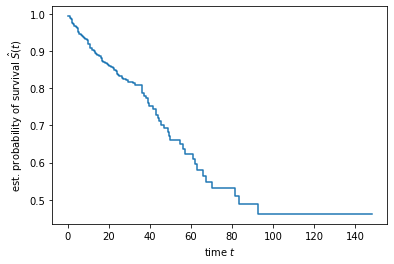

In [ ]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y["OS_STATUS"], data_y["OS_MONTHS"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [ ]:
data_x["AGE_bin"].value_counts()

>=65    292
<65     291
Name: AGE_bin, dtype: int64

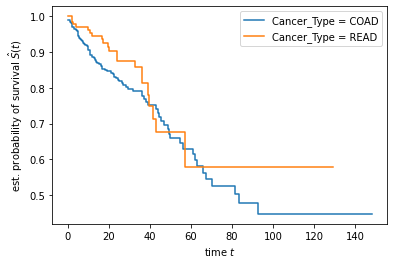

In [ ]:
for cancer_type in ("COAD", "READ"):
    mask_cancer = data_x["CANCER_TYPE_ACRONYM"] == cancer_type
    time_cancer, survival_prob_cancer = kaplan_meier_estimator(
        data_y["OS_STATUS"][mask_cancer],
        data_y["OS_MONTHS"][mask_cancer])

    plt.step(time_cancer, survival_prob_cancer, where="post",
             label="Cancer_Type = %s" % cancer_type)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

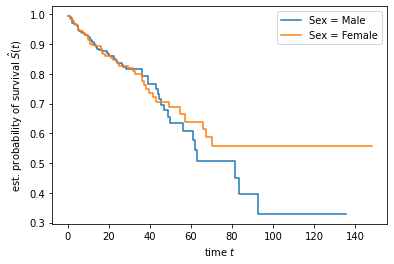

In [ ]:
for sex in ("Male", "Female"):
    mask_sex = data_x["SEX"] == sex
    time_sex, survival_prob_sex = kaplan_meier_estimator(
        data_y["OS_STATUS"][mask_sex],
        data_y["OS_MONTHS"][mask_sex])

    plt.step(time_sex, survival_prob_sex, where="post",
             label="Sex = %s" % sex)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

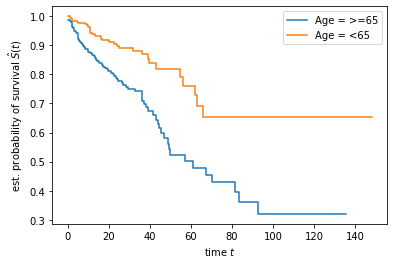

In [ ]:
for age in (">=65", "<65"):
    mask_age = data_x["AGE_bin"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_y["OS_STATUS"][mask_age],
        data_y["OS_MONTHS"][mask_age])

    plt.step(time_age, survival_prob_age, where="post",
             label="Age = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

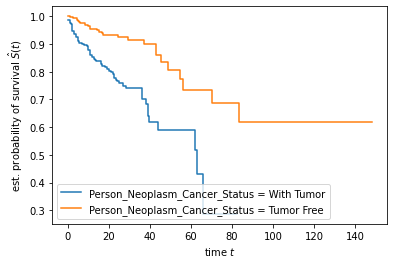

In [ ]:
for tumor in ("With Tumor", "Tumor Free"):
    mask_tumor = data_x["PERSON_NEOPLASM_CANCER_STATUS"] == tumor
    time_tumor, survival_prob_tumor = kaplan_meier_estimator(
        data_y["OS_STATUS"][mask_tumor],
        data_y["OS_MONTHS"][mask_tumor])

    plt.step(time_tumor, survival_prob_tumor, where="post",
             label="Person_Neoplasm_Cancer_Status = %s" % tumor)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

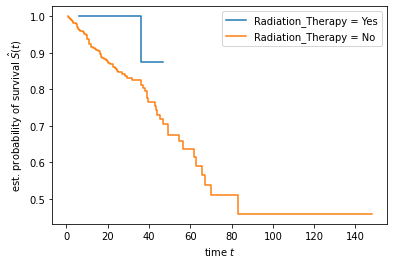

In [ ]:
for treat in ('Yes','No'):
    mask_treat = data_x["RADIATION_THERAPY"] == treat
    time_treat, survival_prob_treat = kaplan_meier_estimator(
        data_y["OS_STATUS"][mask_treat],
        data_y["OS_MONTHS"][mask_treat])

    plt.step(time_treat, survival_prob_treat, where="post",
             label="Radiation_Therapy = %s" % treat)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

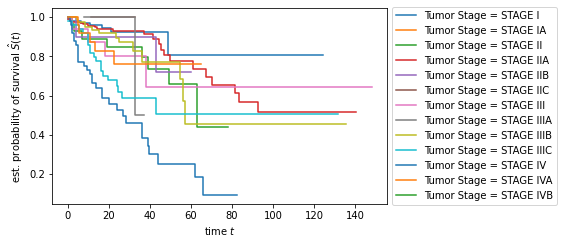

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

for stage in ('STAGE I', 'STAGE IA', 'STAGE II', 'STAGE IIA', 'STAGE IIB', 'STAGE IIC', 'STAGE III', 'STAGE IIIA', 'STAGE IIIB', 'STAGE IIIC', 'STAGE IV', 'STAGE IVA', 'STAGE IVB'):
    mask = data_x["AJCC_PATHOLOGIC_TUMOR_STAGE"] == stage
    time_tumor, survival_prob_tumor = kaplan_meier_estimator(data_y["OS_STATUS"][mask],
                                                           data_y["OS_MONTHS"][mask])
    plt.step(time_tumor, survival_prob_tumor, where="post",
             label="Tumor Stage = %s" % stage)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Cox's Proportional Hazard's Model

In [ ]:
patient.columns

Index(['CANCER_TYPE_ACRONYM', 'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
       'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10', 'PATH_M_STAGE', 'PATH_N_STAGE',
       'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
       'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX',
       'RADIATION_THERAPY', 'IN_PANCANPATHWAYS_FREEZE', 'OS_STATUS',
       'OS_MONTHS', 'AGE_bin'],
      dtype='object')

In [ ]:
patient.isnull().mean()

CANCER_TYPE_ACRONYM                           0.000000
AGE                                           0.000000
SEX                                           0.000000
AJCC_PATHOLOGIC_TUMOR_STAGE                   0.018868
HISTORY_NEOADJUVANT_TRTYN                     0.000000
ICD_10                                        0.001715
PATH_M_STAGE                                  0.010292
PATH_N_STAGE                                  0.000000
PATH_T_STAGE                                  0.000000
PERSON_NEOPLASM_CANCER_STATUS                 0.090909
PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT    0.024014
PRIOR_DX                                      0.000000
RADIATION_THERAPY                             0.159520
IN_PANCANPATHWAYS_FREEZE                      0.000000
OS_STATUS                                     0.000000
OS_MONTHS                                     0.000000
AGE_bin                                       0.000000
dtype: float64

In [28]:
patient.drop(["RADIATION_THERAPY"], axis=1, inplace=True)
patient.dropna(axis=0, inplace=True)

In [29]:
patient = patient[(patient[["OS_MONTHS"]] != 0).any(axis=1)]

In [30]:
patient.isnull().mean()

CANCER_TYPE_ACRONYM                           0.0
AGE                                           0.0
SEX                                           0.0
AJCC_PATHOLOGIC_TUMOR_STAGE                   0.0
HISTORY_NEOADJUVANT_TRTYN                     0.0
ICD_10                                        0.0
PATH_M_STAGE                                  0.0
PATH_N_STAGE                                  0.0
PATH_T_STAGE                                  0.0
PERSON_NEOPLASM_CANCER_STATUS                 0.0
PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT    0.0
PRIOR_DX                                      0.0
IN_PANCANPATHWAYS_FREEZE                      0.0
OS_STATUS                                     0.0
OS_MONTHS                                     0.0
AGE_bin                                       0.0
dtype: float64

In [ ]:
# Use get_dummies instead
# Convert categorical values into numeric values
# patient_numeric = patient.copy()
# patient_numeric['CANCER_TYPE_ACRONYM'].replace(['COAD', 'READ'], [1, 0], inplace=True)
# patient_numeric['SEX'].replace(['Male', 'Female'], [1, 0], inplace=True)
# patient_numeric['AJCC_PATHOLOGIC_TUMOR_STAGE'].replace(['STAGE I', 'STAGE IA', 'STAGE II', 'STAGE IIA', 'STAGE IIB', 'STAGE IIC', 'STAGE III', 'STAGE IIIA', 'STAGE IIIB', 'STAGE IIIC', 'STAGE IV', 'STAGE IVA', 'STAGE IVB'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace=True)
# patient_numeric['HISTORY_NEOADJUVANT_TRTYN'].replace(['Yes', 'No'], [1, 0], inplace=True)
# patient_numeric['ICD_10'].replace(['C18.0', 'C18.2', 'C18.3', 'C18.4', 'C18.5', 'C18.6', 'C18.7', 'C18.9', 'C19', 'C20', 'C49.4', 'C80.1'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
# patient_numeric['PATH_M_STAGE'].replace(['MX', 'M0', 'M1', 'M1A', 'M1B'], [1, 2, 3, 4, 5], inplace=True)
# patient_numeric['PATH_N_STAGE'].replace(['NX', 'N0', 'N1', 'N1A', 'N1B', 'N1C', 'N2', 'N2A', 'N2B'], [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
# patient_numeric['PATH_T_STAGE'].replace(['TIS', 'T1', 'T2', 'T3', 'T4', 'T4A', 'T4B'], [1, 2, 3, 4, 5, 6, 7], inplace=True)
# patient_numeric['PERSON_NEOPLASM_CANCER_STATUS'].replace(['With Tumor', 'Tumor Free'], [1, 0], inplace=True)
# patient_numeric['PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT'].replace(['Yes', 'No'], [1, 0], inplace=True)
# patient_numeric['PRIOR_DX'].replace(['No', 'Yes', 'Yes, History Of Synchronous And Or Bilateral Malignancy'], [1, 2, 3], inplace=True)
# patient_numeric['IN_PANCANPATHWAYS_FREEZE'].replace(['Yes', 'No'], [1, 0], inplace=True)
# patient_numeric['OS_STATUS'].replace(['1:DECEASED', '0:LIVING'], [1, 0], inplace=True)
# patient_numeric['AGE_bin'].replace(['>=65', '<65'], [1, 0], inplace=True)

In [31]:
x = patient[['CANCER_TYPE_ACRONYM', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
       'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10', 'PATH_M_STAGE', 'PATH_N_STAGE',
       'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
       'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX',
       'IN_PANCANPATHWAYS_FREEZE', 'AGE_bin']]
x_dummies = pd.get_dummies(x, dtype='int64')

In [32]:
patient_dummies = pd.concat([patient, x_dummies], axis=1)
patient_dummies = patient_dummies.drop(['CANCER_TYPE_ACRONYM', 'AGE', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE', 'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10', 'PATH_M_STAGE', 'PATH_N_STAGE', 'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS', 'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX', 'IN_PANCANPATHWAYS_FREEZE', 'AGE_bin'], axis=1)
patient_dummies.head()

,OS_STATUS,OS_MONTHS,CANCER_TYPE_ACRONYM_COAD,CANCER_TYPE_ACRONYM_READ,SEX_Female,SEX_Male,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE I,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IA,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE II,AJCC_PATHOLOGIC_TUMOR_STAGE_STAGE IIA,...,PERSON_NEOPLASM_CANCER_STATUS_With Tumor,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT_No,PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT_Yes,PRIOR_DX_No,PRIOR_DX_Yes,"PRIOR_DX_Yes, History Of Synchronous And Or Bilateral Malignancy",IN_PANCANPATHWAYS_FREEZE_No,IN_PANCANPATHWAYS_FREEZE_Yes,AGE_bin_<65,AGE_bin_>=65
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B,0,15.616267,1,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
TCGA-4N-A93T,0,4.799947,1,0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,1,1,0
TCGA-4T-AA8H,0,12.657396,1,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1,1,0
TCGA-5M-AAT4,1,1.610941,1,0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1
TCGA-5M-AAT6,1,9.534142,1,0,1,0,0,0,0,0,...,1,0,1,1,0,0,0,1,1,0


In [34]:
path2 = '/content/drive/My Drive/MSK/patient_dummies.csv'
with open(path2, 'w', encoding = 'utf-8-sig') as f:
  patient_dummies.to_csv(f)

In [ ]:
from sksurv.util import Surv

data_y_numeric = Surv().from_dataframe("OS_STATUS", "OS_MONTHS", patient_dummies)
data_x_numeric = patient_dummies.drop(["OS_STATUS", "OS_MONTHS"], axis=1)
data_y_numeric

In [ ]:
# Standard Cox does not work
# from sklearn import set_config
# from sksurv.linear_model import CoxPHSurvivalAnalysis

# set_config(display="text")

# estimator = CoxPHSurvivalAnalysis()
# estimator.fit(data_x_numeric, data_y_numeric)

In [ ]:
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

set_config(display="text")

In [ ]:
# Use Elastic Net Cox Model to solve the collineaity issue
cox_elastic_net = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01)
cox_elastic_net.fit(data_x_numeric, data_y_numeric)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9)

In [ ]:
def plot_coefficients(coefs, n_highlight):
    _, ax = plt.subplots(figsize=(9, 6))
    n_features = coefs.shape[0]
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(
            alpha_min, coef, name + "   ",
            horizontalalignment="right",
            verticalalignment="center"
        )

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")

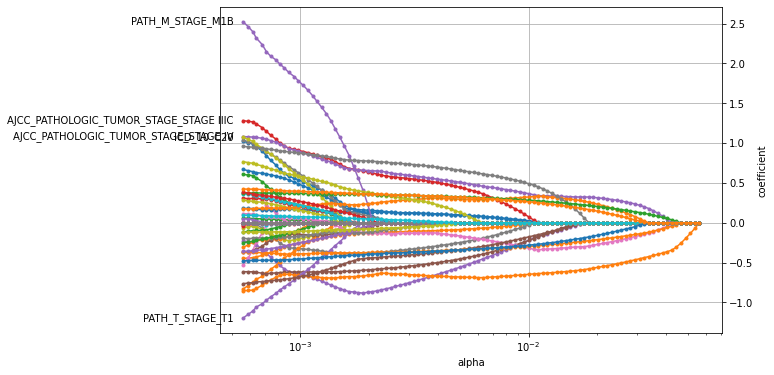

In [ ]:
coefficients_elastic_net = pd.DataFrame(
    cox_elastic_net.coef_,
    index=data_x_numeric.columns,
    columns=np.round(cox_elastic_net.alphas_, 5)
)

plot_coefficients(coefficients_elastic_net, n_highlight=5)

In [ ]:
cox_elastic_net.score(data_x_numeric, data_y_numeric)

0.8376534203072697

In [ ]:
patient_dummies["PATH_M_STAGE_M1B"]

PATIENT_ID
TCGA-3L-AA1B    0
TCGA-4N-A93T    0
TCGA-4T-AA8H    0
TCGA-5M-AAT4    1
TCGA-5M-AAT6    0
               ..
TCGA-F5-6812    0
TCGA-F5-6814    0
TCGA-F5-6861    0
TCGA-F5-6864    0
TCGA-G5-6641    0
Name: PATH_M_STAGE_M1B, Length: 481, dtype: int64

In [ ]:
import warnings
from sklearn.exceptions import FitFailedWarning

coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100)
)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe.fit(data_x_numeric, data_y_numeric)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100))])

In [ ]:
# Find the best alpha
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=1).fit(data_x_numeric, data_y_numeric)

cv_results = pd.DataFrame(gcv.cv_results_)

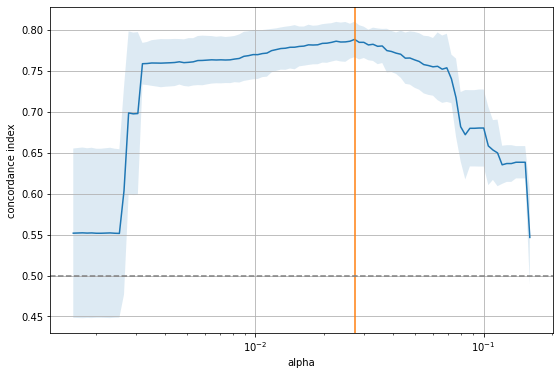

In [ ]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 16


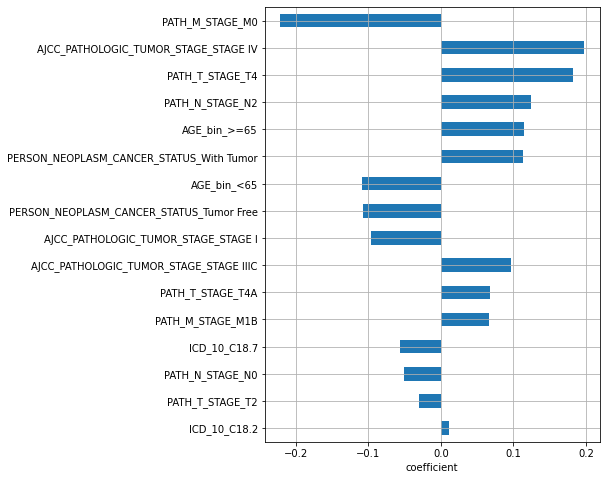

In [ ]:
# Find most important features based on the alpha
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=data_x_numeric.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)

In [ ]:
# Build Prediction Model
coxnet_pred = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, fit_baseline_model=True)
)
coxnet_pred.set_params(**gcv.best_params_)
coxnet_pred.fit(data_x_numeric, data_y_numeric)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alphas=[0.027211165577460193],
                                        fit_baseline_model=True,
                                        l1_ratio=0.9))])

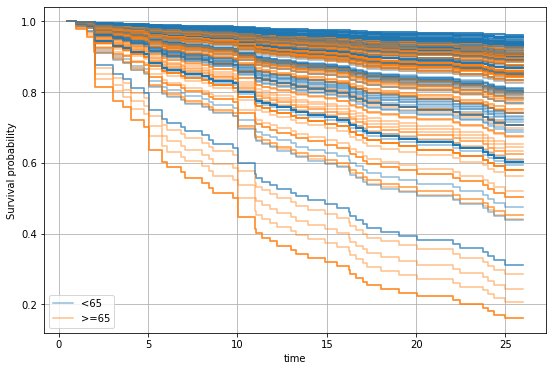

In [ ]:
# Predict using the "AGE_bin" feature
surv_fns = coxnet_pred.predict_survival_function(data_x_numeric)

time_points = np.quantile(data_y_numeric["OS_MONTHS"], np.linspace(0, 0.6, 148))
legend_handles = []
legend_labels = []
_, ax = plt.subplots(figsize=(9, 6))
for fn, label in zip(surv_fns, data_x_numeric.loc[:, "AGE_bin_>=65"].astype(int)):
    line, = ax.step(time_points, fn(time_points), where="post",
                   color="C{:d}".format(label), alpha=0.5)
    if len(legend_handles) <= label:
        name = ">=65" if label == 1 else "<65"
        legend_labels.append(name)
        legend_handles.append(line)

ax.legend(legend_handles, legend_labels)
ax.set_xlabel("time")
ax.set_ylabel("Survival probability")
ax.grid(True)

## Lifelines

### Kaplan-Meier

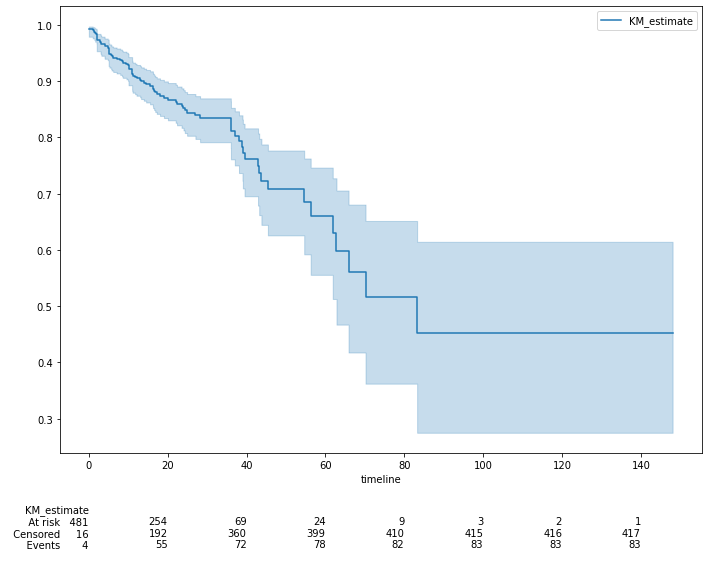

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
kmf = KaplanMeierFitter()
kmf.fit(patient.OS_MONTHS,
        event_observed=patient.OS_STATUS)

kmf.plot_survival_function(at_risk_counts=True, ax=ax)
plt.show()

In [ ]:
print (kmf.event_table)

            removed  observed  censored  entrance  at_risk
event_at                                                  
0.000000         20         4        16       501      501
0.460269          1         0         1         0      481
0.526022          1         0         1         0      480
0.920538          2         0         2         0      479
0.986291          8         1         7         0      477
...             ...       ...       ...       ...      ...
86.629188         1         0         1         0        5
88.207253         1         0         1         0        4
109.280994        1         0         1         0        3
133.182102        1         0         1         0        2
148.009337        1         0         1         0        1

[314 rows x 5 columns]


In [ ]:
print (kmf.confidence_interval_)

            KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.000000                  0.978868                0.996996
0.460269                  0.978868                0.996996
0.526022                  0.978868                0.996996
0.920538                  0.978868                0.996996
0.986291                  0.975988                0.995799
...                            ...                     ...
86.629188                 0.274665                0.614215
88.207253                 0.274665                0.614215
109.280994                0.274665                0.614215
133.182102                0.274665                0.614215
148.009337                0.274665                0.614215

[314 rows x 2 columns]


In [ ]:
print("The median survival time: ", kmf.median_survival_time_, "months")

The median survival time:  83.24292337 months


In [ ]:
# Predict survival rate in 10 months
print(kmf.predict(10))

0.9282086429896202


In [ ]:
T = patient['OS_MONTHS']
C = patient['OS_STATUS']

def plot_km(col):
  ax = plt.subplot(111)
  for i in patient[col].unique():
    ix = patient[col] == i
    kmf.fit(T[ix], C[ix],label=i)
    kmf.plot(ax=ax)

def print_logrank(col):
  log_rank = pairwise_logrank_test(patient['OS_MONTHS'], patient[col], patient['OS_STATUS'])
  return log_rank.summary

,,test_statistic,p,-log2(p)
COAD,READ,3.439643,0.063649,3.973708


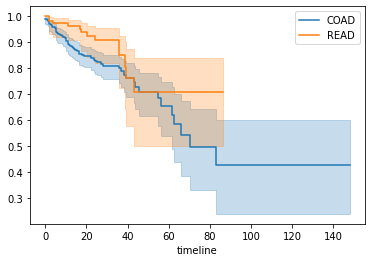

In [ ]:
plot_km('CANCER_TYPE_ACRONYM')
print_logrank('CANCER_TYPE_ACRONYM')

,,test_statistic,p,-log2(p)
Female,Male,0.376149,0.539671,0.889847


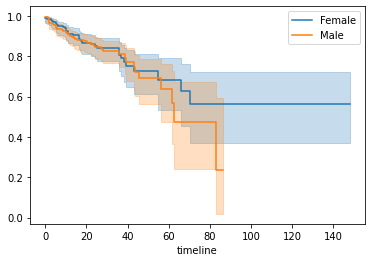

In [ ]:
plot_km('SEX')
print_logrank('SEX')

,,test_statistic,p,-log2(p)
<65,>=65,12.300029,0.000453,11.108357


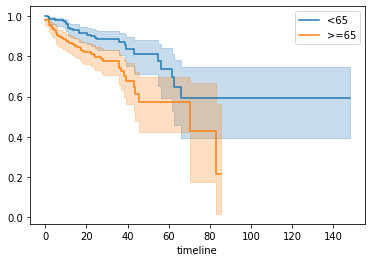

In [ ]:
plot_km('AGE_bin')
print_logrank('AGE_bin')

In [ ]:
from lifelines.statistics import multivariate_logrank_test

In [ ]:
def print_multi_logrank(col):
  log_rank = multivariate_logrank_test(patient['OS_MONTHS'], patient[col], patient['OS_STATUS']).p_value
  print(log_rank)

In [ ]:
print_multi_logrank('AJCC_PATHOLOGIC_TUMOR_STAGE')

2.527889557951129e-12


In [ ]:
columns = ['CANCER_TYPE_ACRONYM', 'SEX', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
       'HISTORY_NEOADJUVANT_TRTYN', 'ICD_10', 'PATH_M_STAGE', 'PATH_N_STAGE',
       'PATH_T_STAGE', 'PERSON_NEOPLASM_CANCER_STATUS',
       'PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT', 'PRIOR_DX',
       'IN_PANCANPATHWAYS_FREEZE', 'AGE_bin']

for i in columns:
  print(i)
  print_multi_logrank(i)

CANCER_TYPE_ACRONYM
0.06364945468482158
SEX
0.5396714704531926
AJCC_PATHOLOGIC_TUMOR_STAGE
2.527889557951129e-12
HISTORY_NEOADJUVANT_TRTYN
0.9197547931437714
ICD_10
0.7270091247144816
PATH_M_STAGE
8.235126500657306e-13
PATH_N_STAGE
2.958193777714459e-07
PATH_T_STAGE
8.527127917091598e-07
PERSON_NEOPLASM_CANCER_STATUS
5.758592590105728e-07
PRIMARY_LYMPH_NODE_PRESENTATION_ASSESSMENT
0.9179452961734799
PRIOR_DX
0.4088583997872687
IN_PANCANPATHWAYS_FREEZE
0.4744855324523939
AGE_bin
0.0004529511434836299
